# &#x1F4DD; REPORT

# TP : Sinusoidal Spectrum and Parameter Estimation


- The students are asked to submit a report by `12/01/2024`.
- The report contains the answers to the questions (in boldface) below, and includes
plots and Matlab code.
- The TP will be carried out individually. As usual, you can consult moderately with others if you get stuck at some point, but your report/software should be written in your own words, and submitted preferably to xxxxxxx.xxx@eurecom.fr . If you don’t have access to Matlab (though students have the right to a free student license), but you have access to (or you prefer) something else that is more or less equivalent, like Python, you can choose the software of your preference. Please indicate in your report.

### **&#x1F516;** Part **&#x1D408;:** Spectrum Estimation

**Review**

$$
\begin{equation}
\hat{S}_{yy}(\mathit{f}) = \hat{S}_{PER}(\mathit{f}) = \frac{1}{N} \left| \sum_{n=0}^{N-1} w_{N,n} y_n e^{-j2\pi fn}  \right|^2
\end{equation}
$$

where $w_{N,n}$ is a windowing function of size $N$ (rectangular by default). The window is normalized in the sense that $\frac{1}{N} \sum_{n=0}^{N-1} w_{N,n}^2 = 1$. In practice, the Fourier Transform (FFT)is computed as the Discrete Fourier Transform (DFT), for which fast algorithms exist known as Fast Fourier Transform (FFT). For computation of the DFT/FFT, it is customary to consider the frequency interval $[0, 1]$ rather than $[−\frac{1}{2}, \frac{1}{2} ]$. The DFT evaluates the Fourier transform of a signal of length $N$ at $N$ equispaced frequencies $f_k = k/N , k = 0,1,...,N−1$. So we get

$$
\begin{equation}
\hat{S}_{yy}(\mathit{f}) = \hat{S}_{PER}(\mathit{f}) = \frac{1}{N} \left| \sum_{n=0}^{N-1} w_{N,n} y_n e^{-j2\pi fn}  \right|^2 = \frac{1}{N} \left| \sum_{n=0}^{N-1} w_{N,n} y_n e^{-j2\pi \frac{k}{N}n}  \right|^2, k = 0,1,...,N−1 .
\end{equation}
$$

We can obtain a finer frequency spacing by padding the data with $N' - N$ zeros and then applying an $N′$-point DFT.  The effective data set becomes

$$
\begin{equation}
y'_n = 
\begin{cases}
&y_n &, n = 0,1, ..., N - 1 \\
&0 &, n = N, N+1, ..., N' - 1
\end{cases}
\end{equation}
$$

which has the same Fourier transform as the original data set. The frequency spacing of the DFT on the data set $y′$ will be $\frac{1}{N'} < \frac{1}{N}$ . This **zero** padding gives no extra resolution, but only a finer evaluation of the periodogram. The window is still of size $N$.

In the autoregressive (AR) modeling (parametric) approach, we take
$$
\begin{equation}
\hat{S}_{AR}(\mathit{f}) =  \frac{\sigma^2_{f,n}}{|A_n(f)|^2}
\end{equation}
$$
for an AR model of order n. The prediction coefficients $A_n = [1 A_{n,1} · · · A_{n,n}]T$ and the prediction error variance are obtained from the Yule-Walker (or normal) equations
$$
\begin{equation}
R_{n+1}A_n = 
 \begin{bmatrix}
  r_0 & r_1 & \cdots & r_n \\
  r_1 & \cdots & \cdots & \vdots \\
  \vdots  & \cdots  & \ddots & r_1  \\
  r_n & \cdots & r_1 & r_0
 \end{bmatrix} = 
 \begin{bmatrix}
  1 \\
  A_{n,1} \\
  \vdots \\
  A_{n,n} 
 \end{bmatrix} =
 \begin{bmatrix}
  \sigma_{f,n}^2 \\
  0 \\
  \vdots \\
  0
 \end{bmatrix}
\end{equation}
$$
where the correlation sequence is estimated as.

$$
\begin{equation}
r_k = \hat{r}_{yy}(k) = \frac{1}{N} \sum_{n=0}^{N-1-k} y_n+ky_n, k = 0, 1, \cdots, n .
\end{equation}
$$

The frequencies f in (4) are again evaluated at the same discrete set. The prediction filter can be computed in an order-recursive $\Delta_{n+1}$ fashion via the $\underline{Levinson \; algorithm}$: 
$
\quad
\begin{cases} 
A_n \\
\sigma_{f,n}^2
\end{cases}
\implies
\begin{cases} 
A_{n+1} \\
\sigma_{f,n+1}^2
\end{cases}
$

$$
\begin{split}
\Delta_{n+1}= [r_{n+1} \cdots r_1] A_n
\\
K_{n+1} = -\frac{\Delta_{n+1}}{\sigma_{f,n}^2} \qquad
\\
\qquad \qquad
A_{n+1} = 
\begin{bmatrix}
A_n \\
0
\end{bmatrix} +
K_{n+1}
\begin{bmatrix}
0 \\
J A_n
\end{bmatrix}
\\
\sigma_{f,n+1}^2 = \sigma_{f,n}^2 \left( 1 - K_{n+1}^2 \right)
\end{split}
$$

Initialization: $A_0 = [1], \sigma_{\mathcal{f},0}^2 = \rho_0$

**&#x1F516;** **TP Session**

**Your report contains the answers to the questions below in boldface.**

The random process that we shall use is of the form

$$
\begin{equation}
y_k = A_1 \cos(2\pi f_1 k + \phi_1) + A_2 \cos(2\pi f_2 k + \phi_2) + v_k
\end{equation}
$$

where $v_k$ is zero-mean unit variance white Gaussian noise. The phases $\phi_i$ are uniform over $[0, 2\pi]$, whereas the default values for the sinusoid amplitudes and frequencies are $A_1 = 20, A_2 = 20, f_1 = 0.057, f_2 = 0.082$.

**&#x1F516;** **&#x0061;)** **For the periodogram, how many data points N are required to resolve the two sinusoids? Why?**

The number of data points $N$ required to resolve two sinusoids in the periodogram depends on the difference in their frequencies ($f_1$ and $f_2$), the length of the observation window, and the sampling rate.

The resolution of the periodogram is determined by the frequency bin width, which is inversely proportional to the length of the observation window. The formula for the frequency resolution ($\Delta f$) in the periodogram is given by: 

$$\Delta f = \frac{1}{T}$$

where $T$ is the length of the observation window.

To resolve two sinusoids, their frequencies ($f_1$ and $f_2$) should be separated by at least half of the frequency resolution ($\Delta f/2$) to avoid ambiguity. In other words, the criterion for resolving two sinusoids is:

$$|f_1 - f_2| \geq \frac{1}{2T}$$

So, the minimum required number of data points ($N$) is related to the observation window length ($T$) as follows:

$$N \geq 2f_{\text{max}}T$$

where $f_{\text{max}}$ is the maximum frequency of interest, and $T$ is the length of the observation window.

Keep in mind that this is a simplified explanation, and the actual resolution might depend on the specific characteristics of the signal, the noise level, and the analysis technique used. In practice, it's common to choose $N$ to be a power of 2 to leverage fast Fourier transform (FFT) algorithms efficiently.

**&#x1F516;** **&#x0062;)** Generate (using sig.m) one realization of $y_k$ with N = 256 samples and compute (with the rectangular ’boxcar’ window in periodo.m) the periodogram in $N′$ = 64, 128, 256, 512 and 1024 frequency points (**make a plot with 6 subplots**). When N′ < N, use only the first N′ data samples (explicitly); when $N′ > N$, use zero padding (done automatically by periodo.m). Comment on the effect of $N′$ and **formulate a requirement for $N′$ as a function of $N$ for proper evaluation of the periodogram**.

In [1]:
using Plots

In [2]:
using Plots: mm

In [3]:
using FFTW

In [4]:
using Distributions
using Random
using LinearAlgebra

In [5]:
include("../modules/operations.jl");

In [6]:
Random.seed!(1); # Setting the seed

In [7]:
# Parameters
N = 256 # Replace with the desired window length
𝑓₁, 𝑓₂ = 0.057, 0.082
𝐴₁, 𝐴₂ = 20, 20
ϕ₁, ϕ₂ = -2π * randn(), 2π * randn()
𝑣 = randn();

In [8]:
include("sig.jl");

&#x1F4E6; You can browse the imported source code here &#x1F449;&#x1F3FC; [sig.jl](sig.jl)

In [9]:
t, yₜ = sig(N); 

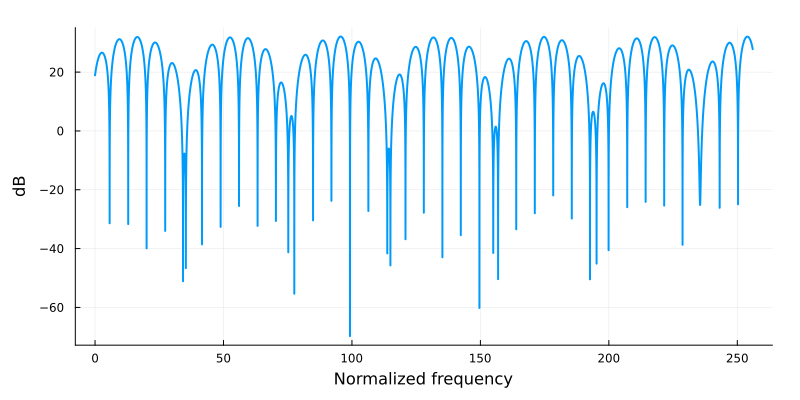

In [10]:
plot(t, 10 * log10.(yₜ.^2)
    , xlabel="Normalized frequency", ylabel="dB"
    , grid=true
    , linewidth = 2
    , legend = :none
    , size = ( 800, 400 )
    , margin = 5mm
)

In [11]:
include("periodo.jl");

&#x1F4E6; You can browse the imported source code here  &#x1F449;&#x1F3FC; [periodo.jl](periodo.jl)

In [12]:
Nₜ = 6:10; @show [ 2^p for p in Nₜ ];

[2 ^ p for p = Nₜ] = [64, 128, 256, 512, 1024]


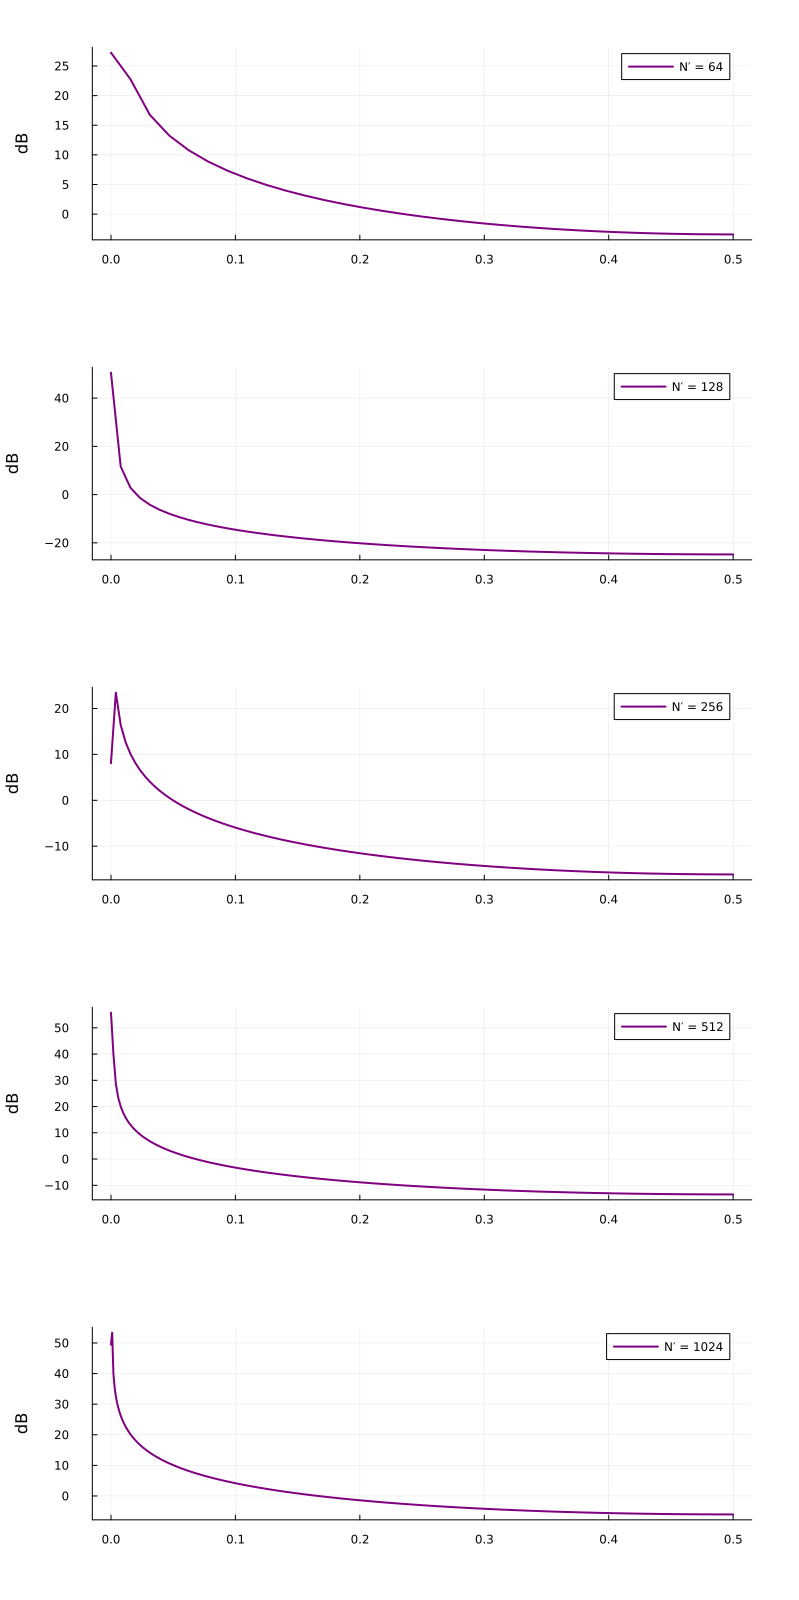

In [13]:
plts2 = []
for p in Nₜ 
    power = 2^p
    t, y = sig(N)
    fₜ, 𝑋ₜ = periodo(y,power);
    p = plot(fₜ, 10 * log10.(𝑋ₜ.^2); 
        labels = "N′ = $power"
        , color = :purple
    )
    push!(plts2, p)
end
plot(plts2...; 
     xlabel="", ylabel="dB"
    , grid=true
    , linewidth = 2
    , legend = :topright
    , size = ( 800, 1600 )
    , layout=(length(Nₜ), 1)
    , margin = 10mm
)

**&#x1F516;** **&#x0063;)** Estimate the correlation sequence of the signal. This can be done by convolving the signal with the time-reversed version of the signal. If for instance “y” contains the 1024 signal samples, the reversed version of “y” can be produced in Matlab via the expression “y(1024:-1:1)”. Convolution can be performed with the Matlab command “conv” (“help conv”). The convolution result will be of length 2047. The correlation sequence r0:n will be the elements 1024:1024+n of the convolution, divided by 1024.

In [14]:
using DSP 

In [15]:
t₍, y₍ = sig(1024); # Generate a 1024 signal to study correlation sequence 

In [16]:
ỹ₍ = ⦰(y₍) # Reverse the signal
r₍ = y₍ ⊗ ỹ₍ # Perform convolution

@show length(r₍)


length(r₍) = 204801


204801

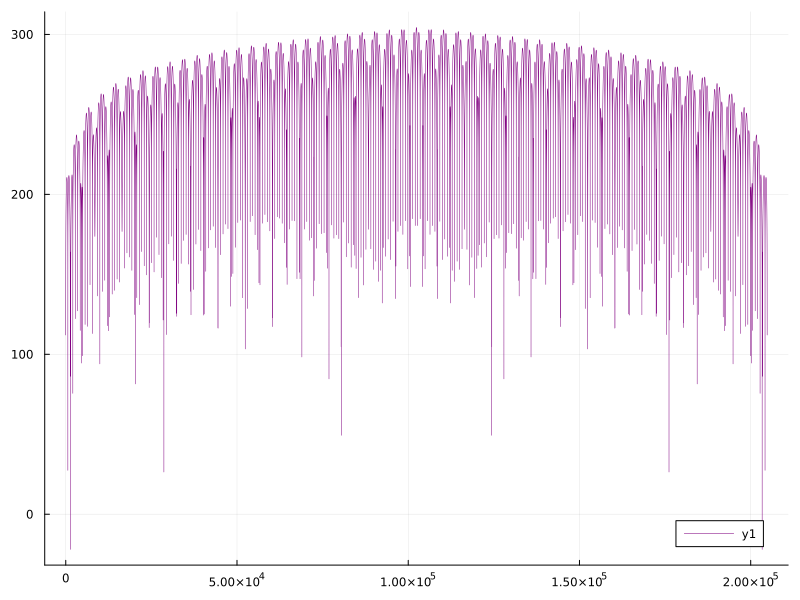

In [17]:
plot(20 * log10.(r₍.^2);
    linewidth = .5
    , size = (800,600)
    , color = :purple
)

In [18]:
# Calculate the correlation sequence r0:n for n elements after the midpoint (1024)
n = 10  # Example, adjust n to your needs
start_index = 1024
end_index = start_index + n - 1  # Adjust for the desired range
r₀₊ₙ = r₍[start_index:end_index] ./ 1024

@show r₀₊ₙ;


r₀₊ₙ = [-166.34592226813925, -165.88475738200066, -165.42025810520207, -164.95244658657808, -164.481345089564, -164.0069759913161, -163.52936178198144, -163.04852506385723, -162.56448855057278, -162.07727506628456]


**&#x1F516;** **&#x0064;)** Write a Matlab function “levinson.m” (“help function”) that takes as input the correla- tion sequence $r_{0:20}$and produces as output the sequence of prediction error variances $\sigma_{f,0:20}^2$ , the prediction error filter coefficients of order 20 $A_{20,0:20} (A_{20,0} = 1)$, and the sequence of PARCORS $K_{1:20}$.

**Hand in the levinson.m routine.**

&#x1F4E6; You can browse the imported source code here &#x1F449;&#x1F3FC; [levinson.jl](levinson.jl)

In [19]:
using LinearAlgebra

In [20]:
include("levinson.jl");

In [21]:
# Call the levinson function
σₛᵩ, A, K = levinson(r₀₊ₙ); @show sizeof(A);

sizeof(A) = 800


**Hand in a plot with these two curves, as also the values of $A_{20,0:20}$, and a plot of
the evolution of $\sigma_{\mathcal{f},0:20}^2$ and the PARCORS.**

For plotting the autoregressive spectrum estimate, append zeros to the prediction error filter coefficients, to the desired number of frequency points.

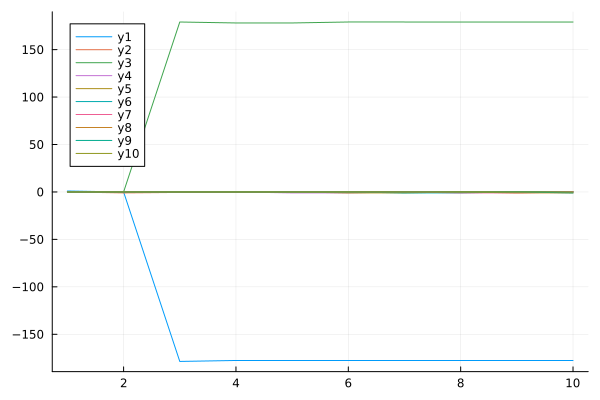

In [22]:
plot(A) # ; @show A;

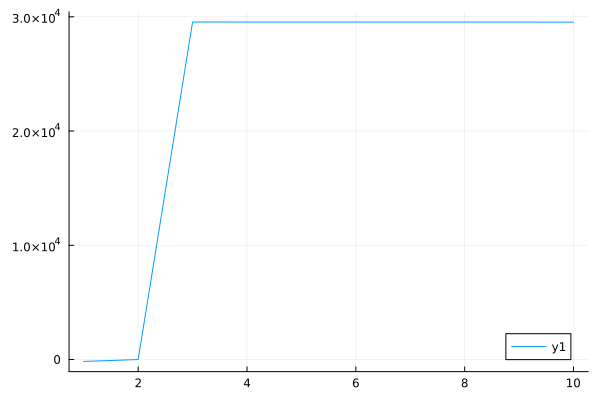

In [23]:
plot(σₛᵩ) 

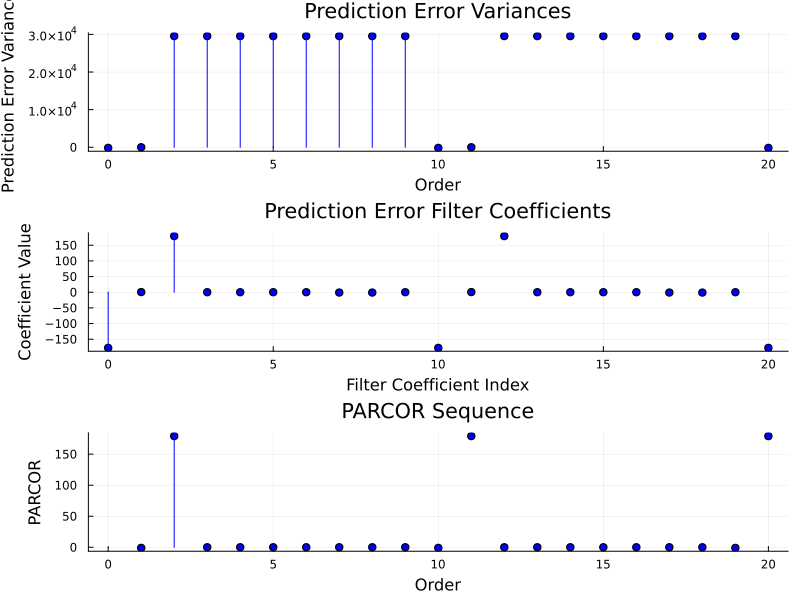

In [24]:
# Create a figure with subplots
fig = plot(layout=(3, 1), size=(800, 600))

# Plot the prediction error variances
plot!(fig, 0:20, σₛᵩ
    , seriestype=:stem
    , line=:stem, marker=:circle ,c=:blue
    # , ms=10, msw=0, lw=4
    , legend = :none
    , subplot=1
    , title="Prediction Error Variances"
    , xlabel="Order", ylabel="Prediction Error Variance"
    # , ylims = (-80,20)
)

# Plot the prediction error filter coefficients
plot!(fig, 0:20, A[end, :]
    , seriestype=:stem
    , line=:stem, marker=:circle ,c=:blue
    # , ms=10, msw=0, lw=4
    , legend = :none
    , subplot=2
    , title="Prediction Error Filter Coefficients"
    , xlabel="Filter Coefficient Index", ylabel="Coefficient Value"
    # , ylims = (-20,20)
)

# Plot the PARCORS
plot!(fig, 1:20, K
    , seriestype=:stem
    , line=:stem, marker=:circle ,c=:blue
    # , ms=10, msw=0, lw=4
    , legend = :none
    , subplot=3
    , title="PARCOR Sequence"
    , xlabel="Order", ylabel="PARCOR"
    # , ylims = (findmin(K),findmax(K))
)


# Show the figure
display(fig)


### **&#x1F516;** Part **&#x1D408;&#x1D408;:** Parameter Estimation

##### Background on ML Estimation of Sinusoid in Noise Parameters

For this second part, consider a single sinusoid in white Gaussian noise with variance $\sigma^2$
$$
\begin{equation}
y_k =s_k +v_k = A_1 \cos(2\pi f_1 k + \phi_1) + v_k \; , \; k = 0, \cdots , n − 1 .
\end{equation}
$$
The Maximum Likelihood estimates of the paramteres $\sigma^2, A_1, \phi_1$ and $f_1$ can be shown to be obtained as
$$
\begin{equation}
\begin{split}
\hat{f}_1 = \operatorname*{arg\,max}_f |\mathcal{Y}(f)| \qquad \qquad \qquad \qquad
\\
\hat{A}_1 = \frac{2}{n} | \mathcal{Y}(\hat{f}_1) | \qquad \qquad \qquad \qquad \qquad 
\\
\hat{\phi}_1 = \operatorname*{arg}_{n - 1} \mathcal{Y}(\hat{f}_1) \qquad \qquad \qquad \qquad \qquad 
\\
\widehat{\sigma^2} = \frac{1}{n} \sum_{k=0}^{n-1} (y_k − \hat{A}_1 \cos(2\pi \hat{f}_1 k + \hat{\phi}_1))^2
\end{split}
\end{equation}
$$
where $Y(f)= \sum_{k=0}^{n-1} y_k e^{−j 2 \pi f k} $ and $ \operatorname{arg} \{ \rho e^{j \theta} \} = \theta$. In order to turn the optimization problem $k=0$ for $\hat{f}_1$ into a practical algorithm, we shall use the DFT. First decide on an acceptable “bias” in the ability to resolve the maximum of $|\mathcal{Y}(f)|$. Let’s call the frequency resolution $\Delta f$ :

$$
\begin{equation}
\Delta f = \frac{1}{m}, \; m = \frac{1}{\Delta f} 
\end{equation}
$$

In order to have a DFT with such a frequency resolution, we need to have a signal of length $m$. We assume $m > n$, the number of samples available. Hence zero pad y_k to obtain $y_0,y_1,...,y_{m−1}$ where in fact $y_n = y_{n+1} = y_{m−1} = 0$. Take the DFT of the zero padded sequence (in Matlab, y_0 is the first element of a signal vector, y_1 the second etc.)

$$
\begin{equation}
Y_l = \sum_{k=0}^{m-1} y_k e^{j 2 \pi \frac{l}{m} k} = \sum_{k=0}^{n-1} y_k e^{j 2 \pi \frac{l}{n} k} .
\end{equation}
$$

Then the Maximum Likelihood estimates can be approximately obtained as
$$
\begin{equation}
\begin{split}
\hat{l} = \operatorname*{arg\,max}_l |\mathcal{Y}_l|, \qquad \hat{f}_1 = \frac{\hat{l}}{m}, \qquad \hat{A}_1 = \frac{2}{n} | \mathcal{Y}_\hat{l} | \qquad \qquad 
\\
\hat{\phi}_1 = \operatorname*{arg} \mathcal{Y}\hat{l}, \quad 
\widehat{\sigma^2} = \frac{1}{n} \sum_{k=0}^{n-1} (y_k − \hat{A}_1 \cos(2\pi \hat{f}_1 k + \hat{\phi}_1))^2
\end{split}
\end{equation}
$$

The search for $f_1$ should be limited to the interval $[0, \frac{1}{2} ]$ (the DFT will show a symmetrical peak at $1-\hat{f}_1$ ). Note that zeropadding only allows us to get within $\Delta f = \frac{1}{m}$ of the maximum of $|\mathcal{Y}(f)|$. It does not improve the estimation accuracy (variance) of the estimator $\hat{f}_1$. The variance can only be reduced by increasing the number of samples $n$ (see Cramer-Rao bound).

The Cramer-Rao bounds for the estimation of the various parameters can be shown to be:

$$
\begin{equation}
\begin{split}
CRB_{\widehat{\sigma^2}} = \frac{2 \sigma^4}{n} \qquad CRB_{\hat{A}_1} = \frac{2 \sigma^2}{n} \\
CRB_{\widehat{\phi_1}} = \frac{8 \sigma^2}{n A_1^2 } \qquad CRB_{\widehat{f_1}} = \frac{6 \sigma^2}{\pi^2 n^3 A_1^2 }
\end{split}
\end{equation}
$$

**&#x1F516;** **&#x0065;)** Sinusoid in White Noise: ML Estimates and CRBs.

In Julia, generate 100 realizations of a sinusoid in Gaussian white noise as in (8) with
$\sigma^2 =1$,$A_1 =\sqrt2$, $\phi = 0$, $\mathcal{f}_1 =1/8$ and $n= 32$ (note: the signal in (8) starts at time $k=0$
whereas in Julia the index in a vector starts at 1). Using the ML procedure given above,
find for each of the 100 runs the estimates $\hat{\sigma^2}(i)$, $\hat{A}_1(i)$, $\hat{\phi}_1(i)$ and $\hat{\mathcal{f}}_1(i)$, for $i=1,\cdots,100$.

In [25]:
using Random
using Statistics
using Optim

In [26]:
# Parameters
n = 32
σ² = 1
𝐴₁ = √2
ϕ₁ = 0
𝑓₁ = 1/8
num_realizations = 100

100

&#x1F4DD; note: the signal in (8) starts at time whereas in Julia (like Matlab) the index in a vector starts at 1).

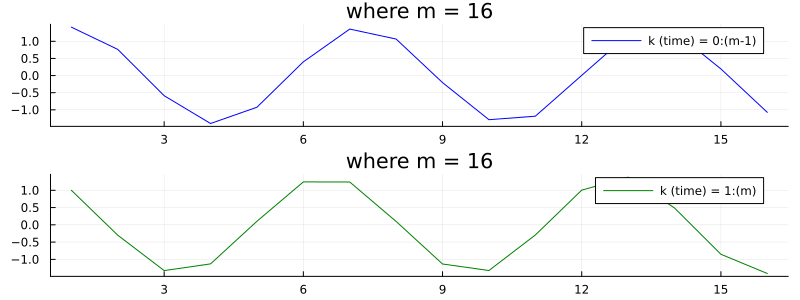

In [27]:
m = 16
pl1 = plot(𝐴₁ .* cos.(2π * 𝑓₁ * 0:(m-1) .+ ϕ₁), label = "k (time) = 0:(m-1)", color = :blue)
pl2 = plot(𝐴₁ .* cos.(2π * 𝑓₁ * 1:(m) .+ ϕ₁), label = "k (time) = 1:(m)", color = :green)
plot(pl1,pl2, layout = (2,1), size = (800,300), legend = :topright, title = "where m = $m")

In [28]:
k = 0:(n-1) # time vector
sₖ = 𝐴₁ .* cos.(2π * 𝑓₁ * k .+ ϕ₁) # Signal
vₖ = sqrt(σ²) .* randn(n) # Noise
yₖ = sₖ .+ vₖ;  # Signal plus noise

In [29]:
𝛰 = x -> round(x, digits=3); # Convenient Function rounding to 3 digits

In [30]:
# Preallocate arrays for estimates
σ̂²₍ₑ₎ = zeros(num_realizations)
𝐴̂₁₍ₑ₎ = zeros(num_realizations)
ϕ̂₁₍ₑ₎ = zeros(num_realizations)
𝑓̂₁₍ₑ₎ = zeros(num_realizations)

# Generate and analyze realizations
for i in 1:num_realizations

    # Perform DFT
    𝑌ₗ = fft(yₖ)

    # ML estimates
    abs𝑌ₗ = abs.(𝑌ₗ)
    𝑁𝑓, î = argmax(abs𝑌ₗ)
    𝑓̂₁₍ₑ₎[i] = (î - 1) / n # Adjust for Julia indexing
    
    # Amplitude estimation
    𝐴̂₁₍ₑ₎[i] = 2 / n * abs𝑌ₗ[î]
    
    # Phase estimation
    ϕ̂₁₍ₑ₎[i] = ∠(𝑌ₗ[î])
    
    # Noise variance estimation
    ŷₖ = 𝐴̂₁₍ₑ₎[i] .* cos.(2π * 𝑓̂₁₍ₑ₎[i] * k .+ ϕ̂₁₍ₑ₎[i])
    σ̂²₍ₑ₎[i] = sum((yₖ .- ŷₖ).^2) / n
end

# You might want to calculate the mean of the estimates across the 100 realizations to see the average estimate
println("Mean estimates:")
println("σ̂²: ", 𝛰(mean(σ̂²₍ₑ₎)))
println("𝐴̂₁: ", 𝛰(mean(𝐴̂₁₍ₑ₎)))
println("ϕ̂₁: ", 𝛰(mean(ϕ̂₁₍ₑ₎)))
println("𝑓̂₁: ", 𝛰(mean(𝑓̂₁₍ₑ₎)))

Mean estimates:
σ̂²: 0.953
𝐴̂₁: 1.371
ϕ̂₁: 0.382
𝑓̂₁: 0.125


**&#x1F516;** **Given the $CRB_{\hat{\mathcal{f}_1}} = \frac{6\sigma^2}{\pi^2 n^3 A_1^2}$, what is an appropriate choice for $m = \frac{1}{\Delta\mathcal{f}}$ ?**

An appropriate choice for $m = \frac{1}{\Delta f}$ in the context of the Cramer-Rao Bound (CRB) for frequency estimation, $CRB_{\hat{f}_1} = \frac{6\sigma^2}{\pi^2 n^3 A_1^2}$, should balance the need for frequency resolution with the theoretical limit of estimation accuracy. Considering the CRB informs us of the best achievable variance in the frequency estimate, the choice of $m$ should allow the DFT to closely approximate the peak of $|\mathcal{Y}(f)|$ within the bounds of this variance.

Given that $CRB_{\hat{f}_1}$ suggests a lower bound on the variance of frequency estimation, choosing $m$ such that $\Delta f$, the frequency resolution, is on the order of or finer than the square root of this CRB (the standard deviation of the frequency estimation error) would be logical. This ensures that the DFT resolution is sufficient to distinguish changes in frequency at least as small as the theoretical precision indicated by the CRB.

Therefore, without specifying a precise formula for $m$ without further context, a general guideline would be to select $m$ large enough that $\Delta f \leq \sqrt{CRB_{\hat{f}_1}}$, ensuring the DFT's frequency resolution is compatible with the expected precision of frequency estimation. This approach optimizes the trade-off between computational efficiency and the desire for precise frequency resolution within the practical constraints of the measurement system and the inherent noise level.

**&#x1F516;** Compute the sample mean and the sample variances for each of the four estimates for the 100 realizations. For instance, for the estimate $\hat{\mathcal{A}}_1$, the sample mean and variance are

$$
\begin{equation}
\overline{\hat{\it{A}}_1} = \frac{1}{100}\sum_{i=1}^{100} \hat{\mathcal{A}}_1(i), Var(\hat{\it{A}}_1) = \frac{1}{100}\sum_{i=1}^{100} \big( \hat{\it{A}}_1(i) - \overline{\hat{\it{A}}_1} \big)^2
\end{equation}
$$

**&#x1F516;** **Give the sample mean and sample variance for $\widehat{\sigma^2}$, $\hat{\mathcal{A}}_1$ , $\hat{\phi}_1$ and $\hat{\mathcal{f}}_1$ .
Do the estimates for the four parameters appear to be biased?
Compare the sample variances of the four estimates to the Cramer-Rao lower bounds given in (13)**. You can provide your answers in the table below.

In [31]:
# Calculate sample means and sample variances
σ̂̅²₍ₑ₎ = 1/100 * ∑(σ̂²₍ₑ₎); Var₍ₑ₎(σ̂²₍ₑ₎) = 1/100 * ∑((σ̂²₍ₑ₎.- σ̂̅²₍ₑ₎).^2)  # typed \sigma\hat\overbar\^2
𝐴̂̅₁₍ₑ₎ = 1/100 * ∑(𝐴̂₁₍ₑ₎); Var₍ₑ₎(𝐴̂₁₍ₑ₎) = 1/100 * ∑((𝐴̂₁₍ₑ₎ .- 𝐴̂̅₁₍ₑ₎).^2) # typed \itA\hat\overbar \_1
ϕ̂̅₁₍ₑ₎ = 1/100 * ∑(ϕ̂₁₍ₑ₎); Var₍ₑ₎(ϕ̂₁₍ₑ₎) = 1/100 * ∑((ϕ̂₁₍ₑ₎ .- ϕ̂̅₁₍ₑ₎).^2)  # typed \phi\hat\overbar \_1
𝑓̂̅₁₍ₑ₎ = 1/100 * ∑(𝑓̂₁₍ₑ₎); Var₍ₑ₎(𝑓̂₁₍ₑ₎) = 1/100 * ∑((𝑓̂₁₍ₑ₎ .- 𝑓̂̅₁₍ₑ₎).^2); # typed \itf\hat\overbar \_1

In [32]:
using PrettyTables

In [33]:
# Compute CRBs
CRB_σ² = (2 * σ²^4) / n
CRB_𝐴₁ = (2 * σ²) / n
CRB_ϕ₁ = (8 * σ²) / (n * 𝐴₁^2)
CRB_𝑓̂̅₁ = (6 * σ²) / (π^2 * n^3 * 𝐴₁^2);

In [34]:
# Output the results
data = [ 
    "σ²" 1.      𝛰(σ̂̅²₍ₑ₎)  𝛰(Var₍ₑ₎(σ̂²₍ₑ₎))  𝛰(CRB_σ²);
    "𝐴₁" 1.4142  𝛰(𝐴̂̅₁₍ₑ₎)  𝛰(Var₍ₑ₎(𝐴̂₁₍ₑ₎)) 𝛰(CRB_𝐴₁);
    "ϕ₁" 0.      𝛰(ϕ̂̅₁₍ₑ₎)  𝛰(Var₍ₑ₎(ϕ̂₁₍ₑ₎)) 𝛰(CRB_ϕ₁);
    "𝑓₁" 0.125   𝛰(𝑓̂̅₁₍ₑ₎)  𝛰(Var₍ₑ₎(𝑓̂₁₍ₑ₎)) 𝛰(CRB_𝑓̂̅₁);
];
header = ["θ", "θₜᵣᵤₑ", "θ̂̅₍ₑ₎", " Var₍ₑ₎(θ̂)", "CRB₀"];
pretty_table(data;
      header = header
    , standalone = true
    , backend = Val(:html)
)

<!DOCTYPE html>
 
 
 

 
 
 
 
 
 θ 
 θₜᵣᵤₑ 
 θ̂̅₍ₑ₎ 
 Var₍ₑ₎(θ̂) 
 CRB₀ 
 
 
 
 
 σ² 
 1.0 
 0.953 
 0.686 
 0.062 
 
 
 𝐴₁ 
 1.4142 
 1.371 
 1.552 
 0.062 
 
 
 ϕ₁ 
 0.0 
 0.382 
 0.066 
 0.125 
 
 
 𝑓₁ 
 0.125 
 0.125 
 0.0 
 0.0

**&#x1F516;** **&#x0066;)** Sinusoid in White Noise: Covariance Matching.

Another estimation method for the parameters in a parametric signal model consists of matching some moments of the random signal. If we assume for a moment that the phase of the sinusoidal signal would be random, then we get for the covariance sequence of the stationary noisy signal $y_k$

$$
\begin{equation}
r_p = r_{yy}(p) = \it{E}y_ky_k+p = \frac{\it{A}_1^2}{2} cos(2\pi \it{f}_1 p) + \sigma^2\delta_{p0}
\end{equation}
$$

From the correlations at lags $p = 0, 1, 2,$ we can retrieve the signal parameters as follows:

$$
\begin{equation}
r_1 \neq 0:
\begin{cases}
\it{X} &= \frac{r_2 + \sqrt{r_2^2 + 8 r|1^2}}{4 r_1} \\
\it{f}_1 &= \frac{1}{2\pi} \arccos(\it{X}) \\
\it{A}_1 &= \sqrt{2r_1/\it{X}} \\
\it{\sigma^2} &= r_0 - \it{A}_1^2 /2
\end{cases} \qquad
, 
r_1 = 0:
\begin{cases}
\it{X} &= 0 \\
\it{f}_1 &= \frac{1}{4} \\
\it{A}_1 &= \sqrt{-2r_2} \\
\it{\sigma^2} &= r_0 - \it{A}_1^2 /2
\end{cases}
\end{equation}
$$

We now get estimates for these parameters by replacing the theoretical correlations $r_p$ by sample correlations as in (6). In Matlab, generate 100 sinusoids in Gaussian white noise as in(8) with $\sigma^2 =1$,$\it{A}_1 = \sqrt(2)$, $\phi_1 =0$,$\it{f}_1 =1/8$ and $n=32$ (you can use the 100realizations from question **(e)** above). Using the moment matching procedure given above, find for each of the 100 runs the estimates $\hat{\sigma^2}(i)$, $\hat{A}_1(i)$ and $\hat{\mathcal{f}}_1(i)$, for $i=1,\cdots,100$.

**Give the sample mean and sample variance for $\hat{\sigma^2}(i)$, $\hat{A}_1(i)$ and $\hat{\mathcal{f}}_1(i)$**
**Do the estimates for these three parameters appear to be biased?**
**Compare the sample variances of the three estimates to the Cramer-Rao lower bounds given in (13) and to the sample variances obtained in question (e) above using the ML approach.** You can provide your answers in the table below.

The provided approach for parameter estimation in a parametric signal model involves moment matching, specifically using the covariance sequence of the stationary noisy signal $y_k$. This method is an alternative to Maximum Likelihood estimation and can be particularly useful when the phase of the sinusoidal signal is assumed to be random. 

Given the covariance sequence:

$r_p = r_{yy}(p) = E[y_ky_{k+p}] = \frac{A_1^2}{2} \cos(2\pi f_1 p) + \sigma^2\delta_{p0}$

And using the correlations at lags $p = 0, 1, 2$, the signal parameters $f_1$, $A_1$, and $\sigma^2$ can be estimated based on whether $r_1$ is nonzero or zero.

### Estimation Process:

1. **Compute Sample Correlations**: The first step involves calculating the sample correlations $\hat{r}_{yy}(k)$ for $k = 0, 1, \cdots, n$, which are used as approximations of the theoretical correlations $r_p$.

2. **Parameter Estimation**:
   - When $r_1 \neq 0$:
     - Compute $X$ using $r_1$ and $r_2$.
     - Estimate $f_1$ using $X$.
     - Estimate $A_1$ using $r_1$ and $X$.
     - Estimate $\sigma^2$ using $r_0$ and $A_1$.
   - When $r_1 = 0$:
     - Set $X = 0$, implying $f_1 = \frac{1}{4}$.
     - Estimate $A_1$ using $r_2$.
     - Estimate $\sigma^2$ using $r_0$ and $A_1$.

In [35]:
# Preallocate arrays for estimates
σ̂²₍𝑓₎ = zeros(num_realizations)
𝐴̂₁₍𝑓₎ = zeros(num_realizations)
𝑓̂₁₍𝑓₎ = zeros(num_realizations)

# Function to compute sample correlations
function sample_correlations(y, N, k_max)
    [sum(y[1:N-k] .* y[1+k:N]) / (N-k) for k in 0:k_max]
end

# Moment matching procedure
for i = 1:num_realizations
    r = sample_correlations(yₖ, n, 2)  # Compute sample correlations r_0, r_1, r_2

    # Parameter estimation
    if r[2] != 0  # r_1 != 0 case
        𝑋₍𝑓₎ = (r[3] + √(r[3]^2 + 8 * r[2]^2)) / (4 * r[2])
        𝑓̂₁₍𝑓₎[i] = acos(𝑋₍𝑓₎) / (2π)
        𝐴̂₁₍𝑓₎[i] = √(2 * r[2] / 𝑋₍𝑓₎)
        σ̂²₍𝑓₎[i] = r[1] - 𝐴̂₁₍𝑓₎[i]^2 / 2
    else  # r_1 = 0 case
        𝑋₍𝑓₎[i] = 0
        𝑓̂₁₍𝑓₎[i] = 1/4
        𝐴̂₁₍𝑓₎[i] = √(-2 * r[3])
        σ̂²₍𝑓₎[i] = r[1] - 𝐴̂₁₍𝑓₎[i]^2 / 2
    end

end

# Output mean estimates
println("Mean estimates across 100 runs:")
println("Mean σ²: ", mean(σ̂²₍𝑓₎))
println("Mean A₁: ", mean(𝐴̂₁₍𝑓₎))
println("Mean f₁: ", mean(𝑓̂₁₍𝑓₎))


Mean estimates across 100 runs:
Mean σ²: 1.000249225614237
Mean A₁: 1.3361117731810277
Mean f₁: 0.11561965187800059


In [36]:
# Calculate sample means and sample variances
σ̂̅²₍𝑓₎ = 1/100 * ∑(σ̂²₍𝑓₎); Var₍𝑓₎(σ̂²₍𝑓₎) = 1/100 * ∑((σ̂²₍𝑓₎.- σ̂̅²₍𝑓₎).^2)  # typed \sigma\hat\overbar\^2
𝐴̂̅₁₍𝑓₎ = 1/100 * ∑(𝐴̂₁₍𝑓₎); Var₍𝑓₎(𝐴̂₁₍𝑓₎) = 1/100 * ∑((𝐴̂₁₍𝑓₎ .- 𝐴̂̅₁₍𝑓₎).^2) # typed \itA\hat\overbar \_1
𝑓̂̅₁₍𝑓₎ = 1/100 * ∑(𝑓̂₁₍𝑓₎); Var₍𝑓₎(𝑓̂₁₍𝑓₎) = 1/100 * ∑((𝑓̂₁₍𝑓₎ .- 𝑓̂̅₁₍𝑓₎).^2); # typed \itf\hat\overbar \_1

In [37]:
# Output the results
data = [ 
    "σ²" 1.      𝛰(σ̂̅²₍𝑓₎)  𝛰(Var₍𝑓₎(σ̂²₍𝑓₎)) 𝛰(CRB_σ²) 𝛰(Var₍ₑ₎(σ̂²₍ₑ₎));
    "𝐴₁" 1.4142  𝛰(𝐴̂̅₁₍𝑓₎)  𝛰(Var₍𝑓₎(𝐴̂₁₍𝑓₎)) 𝛰(CRB_𝐴₁) 𝛰(Var₍ₑ₎(𝐴̂₁₍ₑ₎)) ;
    "𝑓₁" 0.125   𝛰(𝑓̂̅₁₍𝑓₎)  𝛰(Var₍𝑓₎(𝑓̂₁₍𝑓₎)) 𝛰(CRB_𝑓̂̅₁) 𝛰(Var₍ₑ₎(𝑓̂₁₍ₑ₎)) ;
];
header = ["θ", "θₜᵣᵤₑ", "θ̂̅₍ₑ₎", " Var₍𝑓₎(θ̂)", "CRB₀", " Var₍ₑ₎(θ̂)"];
pretty_table(data;
      header = header
    , standalone = true
    , backend = Val(:html)
)

<!DOCTYPE html>
 
 
 

 
 
 
 
 
 θ 
 θₜᵣᵤₑ 
 θ̂̅₍ₑ₎ 
 Var₍𝑓₎(θ̂) 
 CRB₀ 
 Var₍ₑ₎(θ̂) 
 
 
 
 
 σ² 
 1.0 
 1.0 
 0.783 
 0.062 
 0.686 
 
 
 𝐴₁ 
 1.4142 
 1.336 
 1.49 
 0.062 
 1.552 
 
 
 𝑓₁ 
 0.125 
 0.116 
 0.0 
 0.0 
 0.0